# Reinforcement learning (Aprendizaje por refuerzo)

El aprendizaje por refuerzo (RL) es una técnica de machine learning (ML) que entrena al software para que tome decisiones a fin de lograr los mejores resultados. Imita el proceso de aprendizaje por ensayo y error que los humanos utilizan para lograr sus objetivos.
<HR>
 <h3>
  NOMBRE:
  
  * POLO ORELLANA BRAYAN SIMON
  
  <br>
  CARRERA: INGENIERIA DE SISTEMAS
  <BR>
  FECHA: 17/06/2024 <BR>

  * [Enlace de invitacion para ser colaborador](https://github.com/bspoloo/SIS420-012024/invitations)
  
  * [Enlace al git hub](https://github.com/bspoloo/SIS420-012024/tree/main/Laboratorios/Laboratorio%20Practica)

 <h3>

## Roompecabezas

El objetivo de este cuadernillo es hacer que un agente de tenga la capacidad de resolver un rompecabezas, ya sea un rompecabezas deslizable

### Importacion de Librerias
Importamos las librerias necesarias para la creacion de este cuadernillo:

In [1]:
#Importamos la librería gym para poder utilizar el entorno de OpenAI
import gymnasium as gym
#Importamos la librería numpy para poder trabajar con arrays
import numpy as np
#Importamos la librería matplotlib para poder realizar gráficas
import matplotlib.pyplot as plt 
#Importamos la librería os para poder interactuar con el sistema operativo
import os
#Importamos la función clear_output de la librería IPython.display para poder limpiar la salida de la celda
from IPython.display import clear_output
#Importamos la librería random para poder generar números aleatorios 
import random
#Importamos la librería matplotlib para poder realizar gráficas 
import matplotlib.pyplot as plt
#Importamos la librería pickle para poder guardar los datos en un archivo 
import pickle
#Importamos la librería time para poder utilizar la función sleep
import time
#Importamos la librería pandas para poder trabajar con dataframes 
import pandas as pd
#Importamos la librería collections para poder trabajar con diccionarios
from collections import defaultdict
#Importamos la librería gym para poder utilizar el entorno de OpenAI
from gym import spaces
#thinder import para la interfaz gráfica
import tkinter as tk
#Importamos la librería messagebox de tkinter para poder mostrar mensajes emergentes
from tkinter import messagebox
#Importamos la librería Image de PIL para poder trabajar con imágenes
from PIL import Image, ImageTk
import random


Verficamos nuestro entorno

### Implementacion del Modelo
Para este modelo se crearon dos clases, el `Game` y `Agente`, esto para tener el codigo mas entendible y mas ordenado:

#### Creacion de funcion para graficar las recompensas acumuladas cada episodio
Esta Clase tien la funcion de graficar, el cual toma los parametros de premios por episodio, el numero de episodios:

In [2]:

def Graphic_Average_reward_per_epsilon(reward_per_epsilon):
    plt.figure(figsize=(8, 5))
    plt.plot(reward_per_epsilon)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa media')
    plt.title('Recompensa media por episodio para diferentes valores de $\epsilon$')
    plt.show()
    
def Graphic_Average_reward_per_epsilon(actions_per_epsilon):
    plt.figure(figsize=(8, 5))
    plt.plot(actions_per_epsilon)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Experiencias')
    plt.ylabel('Ratio acción óptima')
    plt.title('Acciones optimas por episodio para diferentes valores de $\epsilon$')
    plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
C:\Users\ANIMETX\AppData\Local\Temp\ipykernel_22740\4285020900.py:8: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Recompensa media por episodio para diferentes valores de $\epsilon$')
C:\Users\ANIMETX\AppData\Local\Temp\ipykernel_22740\4285020900.py:18: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Acciones optimas por episodio para diferentes valores de $\epsilon$')


### Agente
Esta clase tiene es nuestro agente, el que interactua con el entorno del juego, el que toma las acciones:

- **Hyperparametros:**
    * epsilon:  $\epsilon$ es un parámetro crucial en las políticas de aprendizaje por refuerzo, permitiendo al agente equilibrar la exploración y la explotación para aprender de manera eficiente en un entorno dinámico.
    * alpha: $\alpha$ (alpha) es el parámetro de tasa de aprendizaje (learning rate). Este parámetro controla cuánto se actualizan los valores en la tabla Q o la función de valor en cada paso de aprendizaje.
    * gamma: En el contexto del aprendizaje por refuerzo (Reinforcement Learning, RL), $\gamma$ (gamma) es el parámetro del factor de descuento (discount factor). Este parámetro determina la importancia de las recompensas futuras en la toma de decisiones del agente.
    * epsilon_decay_rate: valor que controla cómo disminuye el valor de epsilon a medida que el agente interactúa más con el entorno.

- **Variables del Agente:**
    * q: La tabla Q que almacena los valores de Q para cada estado-acción.

In [3]:
class Agent:
    def __init__(self, game, learning_rate=0.1, discount_factor=0.9, exploration_rate=1):
        self.game = game
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.q_table = {}
        self.actions = ['up', 'down', 'left', 'right']
        
        # Inicializar la tabla Q con valores arbitrarios
        for i in range(game.rows):
            for j in range(game.cols):
                state = (i, j)
                self.q_table[state] = {action: 0 for action in self.actions}
    
    def choose_action(self, state):
        # Epsilon-greedy para seleccionar una acción
        if random.uniform(0, 1) < self.exploration_rate:
            return random.choice(self.actions)
        else:
            # Seleccionar la acción con el valor Q máximo
            return max(self.q_table[state], key=self.q_table[state].get)
    
    def update_q_table(self, state, action, reward, next_state):
        # Actualizar la tabla Q según el algoritmo Q-Learning
        max_next_q = max(self.q_table[next_state].values()) if next_state in self.q_table else 0
        current_q = self.q_table[state][action]
        new_q = current_q + self.learning_rate * (reward + self.discount_factor * max_next_q - current_q)
        self.q_table[state][action] = new_q
    
    def train(self, num_episodes=100):
        
        rewards_per_episode = np.zeros(num_episodes)
        optimal_actions = np.zeros(num_episodes)
        
        for episode in range(num_episodes):
            self.game.shuffle_pieces()
            current_state = (self.game.rows-1, self.game.cols-1)  # Estado inicial (posición vacía)
            episode_reward = 0 # primero inicializamos el estado en 0
            done = False
            truncated = False
            step = 0
            while not done and not truncated:
                action = self.choose_action(current_state)
                row, col = current_state
                if action == 'up' and row > 0:
                    new_state = (row - 1, col)
                elif action == 'down' and row < self.game.rows - 1:
                    new_state = (row + 1, col)
                elif action == 'left' and col > 0:
                    new_state = (row, col - 1)
                elif action == 'right' and col < self.game.cols - 1:
                    new_state = (row, col + 1)
                else:
                    continue  # Acción inválida, saltar este paso
                
                reward = 1 if self.game.click_piece(new_state[0], new_state[1]) else -1
                self.update_q_table(current_state, action, reward, new_state)
                
                print (f"episodio: {episode}, step:{step} Estado actual: {current_state}, Acción: {action}, Nuevo estado: {new_state}, Recompensa: {reward}")
                
                
                episode_reward += reward
                optimal_actions[episode] += int(action == max(self.q_table[current_state], key=self.q_table[current_state].get))
                
                current_state = new_state
                done, truncated = self.game.check_win(step)
                self.exploration_rate = max(0.1, self.exploration_rate - 0.01)  # Decrementar epsilon
                step += 1
                self.game.update_display()
                self.game.root.update()  # Actualizar la ventana principal de tkinter
            messagebox.showinfo("Episodio completado", f"Episodio {episode + 1} completado.")
            
        return rewards_per_episode, optimal_actions

### Game
esta clase estara encargada del manejo en el entorno de juego del agente:

* __init__(self, rows, cols, image_path, root): Este es el constructor de la clase Game. Toma como parámetros el número de filas (rows), el número de columnas (cols), la ruta de la imagen (image_path) y la raíz tkinter (root). Inicializa las variables necesarias para manejar el rompecabezas, carga la imagen, baraja las piezas y crea los botones para la interfaz gráfica.

* load_image(self): Este método carga la imagen especificada por image_path usando la biblioteca PIL (Pillow). La imagen se redimensiona a un tamaño predefinido (800x640 píxeles) y luego se divide en piezas según el número de filas y columnas especificado (rows y cols). Cada pieza se recorta de la imagen original y se guarda en self.pieces. Además, self.pieces_original guarda una copia de las piezas en su estado original. La última pieza en self.pieces se establece como None, lo que representa la pieza vacía del rompecabezas.

* shuffle_pieces(self): Este método baraja las piezas del rompecabezas. Primero aplana la lista de piezas (self.pieces) y luego las baraja aleatoriamente usando la función random.shuffle(). Después de barajar, las piezas se vuelven a organi* zar en su estructura de filas y columnas original.

* click_piece(self, row, col): Este método intenta mover la pieza seleccionada en la posición (row, col). Dependiendo de la dirección en la que se pueda mover la pieza (arriba, abajo, izquierda, derecha), intercambia la posición de la pieza vacía (None) con la pieza seleccionada. Luego, llama al método update_display() para reflejar el cambio en la interfaz gráfica. Devuelve True si se realizó un movimiento válido, de lo contrario False.

* update_display(self): Este método actualiza la interfaz gráfica con las piezas actuales del rompecabezas. Recorre todas las piezas (self.pieces), crea PhotoImage para cada pieza que no sea None, y configura los botones correspondientes en self.buttons con las imágenes actualizadas. Si una pieza es None, configura el botón con una imagen vacía. Finalmente, llama a self.root.update_idletasks() para forzar la actualización de la ventana tkinter.

* check_win(self): Este método verifica si todas las piezas están en la posición correcta comparando self.pieces con self.pieces_original. Devuelve True si todas las piezas están en la posición original (es decir, el rompecabezas está resuelto), de lo contrario devuelve False.

* create_buttons(self): Este método crea botones tkinter para cada pieza del rompecabezas en self.buttons. Itera sobre self.pieces, crea PhotoImage para cada pieza que no sea None, y configura los botones correspondientes en la ventana tkinter (self.root). Cada botón se configura con una imagen y una función de comando (lambda) que llama a self.click_piece(row, col) cuando se hace clic en el botón.

In [4]:
class Game:
    def __init__(self, rows, cols, image_path, root):
        self.rows = rows
        self.cols = cols
        self.image_path = image_path
        self.root = root
        
        self.piece_width = 0
        self.piece_height = 0
        self.max_steps = 1000
        self.pieces = []
        self.pieces_original = []
        
        self.load_image()
        self.shuffle_pieces()
        self.create_buttons()
    
    def load_image(self):
        image = Image.open(self.image_path)
        image = image.resize((800, 640))  # Ajusta el tamaño de la imagen según sea necesario
        self.piece_width = image.width // self.cols
        self.piece_height = image.height // self.rows
        
        for i in range(self.rows):
            row = []
            for j in range(self.cols):
                x = j * self.piece_width
                y = i * self.piece_height
                piece = image.crop((x, y, x + self.piece_width, y + self.piece_height))
                row.append(piece)
            self.pieces.append(row)
            self.pieces_original.append(row.copy())  # Guardar una copia de las piezas originales
        
        self.pieces[self.rows-1][self.cols-1] = None  # La última pieza es la pieza vacía (sin imagen)
    
    def shuffle_pieces(self):
        flat_pieces = [item for sublist in self.pieces for item in sublist]
        random.shuffle(flat_pieces)
        for i in range(self.rows):
            for j in range(self.cols):
                self.pieces[i][j] = flat_pieces[i * self.cols + j]
    
    def click_piece(self, row, col):
        # Intenta mover la pieza seleccionada
        if row > 0 and self.pieces[row-1][col] is None:  # Mover hacia arriba
            self.pieces[row-1][col], self.pieces[row][col] = self.pieces[row][col], self.pieces[row-1][col]
        elif row < self.rows-1 and self.pieces[row+1][col] is None:  # Mover hacia abajo
            self.pieces[row+1][col], self.pieces[row][col] = self.pieces[row][col], self.pieces[row+1][col]
        elif col > 0 and self.pieces[row][col-1] is None:  # Mover hacia la izquierda
            self.pieces[row][col-1], self.pieces[row][col] = self.pieces[row][col], self.pieces[row][col-1]
        elif col < self.cols-1 and self.pieces[row][col+1] is None:  # Mover hacia la derecha
            self.pieces[row][col+1], self.pieces[row][col] = self.pieces[row][col], self.pieces[row][col+1]
        else:
            return False
        
        self.update_display()
        return True
    
    def update_display(self):
        # Actualizar la interfaz gráfica con las piezas actuales
        for i in range(self.rows):
            for j in range(self.cols):
                piece = self.pieces[i][j]
                if piece is not None:
                    photo = ImageTk.PhotoImage(piece)
                    self.buttons[i][j].config(image=photo)
                    self.buttons[i][j].image = photo
                else:
                    self.buttons[i][j].config(image='')
        
        self.root.update_idletasks()
    
    def check_win(self, current_step):
        done = False
        truncated = False
        
        if current_step >= self.max_steps:
            done = False
            truncated = True
            return done, truncated
        
        # Verificar si todas las piezas están en la posición correcta
        for i in range(self.rows):
            for j in range(self.cols):
                if self.pieces[i][j] is not None and (self.pieces[i][j] != self.pieces_original[i][j]):
                    done = False
                    truncated = False
                    return done, truncated
        done = True
        truncated = True
        return done, truncated
    
    def create_buttons(self):
        self.buttons = []
        for i in range(self.rows):
            row = []
            for j in range(self.cols):
                if self.pieces[i][j] is not None:
                    photo = ImageTk.PhotoImage(self.pieces[i][j])
                    button = tk.Button(self.root, image=photo, command=lambda row=i, col=j: self.click_piece(row, col))
                    button.image = photo
                else:
                    button = tk.Button(self.root)
                button.grid(row=i, column=j, padx=2, pady=2)
                row.append(button)
            self.buttons.append(row)

## Exploracion del agente
La exploracion del agente consiste en probar diferentes acciones para descubrir cuáles resultan en las mejores recompensas a largo plazo. Es un componente crucial en la estrategia de aprendizaje porque permite al agente evitar quedarse atrapado en una solución subóptima que puede parecer buena en el corto plazo pero no lo es a largo plazo.

En esta parte haremos que diferentes agentes con diferentes valores de epsilon, exploren el entorno del `HighWayEnv`, y almacenaremos las recompensas por episodio para luego mostrarlas en una grafica para ver el comportamiento de del agente a lo largo de los episodio.

In [ ]:
# Dimensiones del rompecabezas
ROWS = 4
COLS = 5
IMAGE_PATH = r"F:\acceso\7.- septimo semestre\Inteligencia artificial I\SIS420-012024\Parciales\Tercer Parcial\Aprendizaje por refuerzo\gato.jpg"  # Cambia esto por la ruta de tu imagen
episodes = 10
# Configuración de la interfaz gráfica y juego
root = tk.Tk()
root.title("Rompecabezas")

game = Game(ROWS, COLS, IMAGE_PATH, root)
agent = Agent(game)

# Entrenar al agente
reward_per_episode , optimal_actions_per_episode=  agent.train(num_episodes=episodes)
root.mainloop()

average_reward_per_epsilon =  reward_per_episode/ episodes
average_optimal_actions_per_episode = optimal_actions_per_episode/ episodes

#### Analisi de graficas de exploracion
Para esta grafica se puede observar las recompensas medias del agente en todo el entorno de exploracion, esto para cada epsilon:


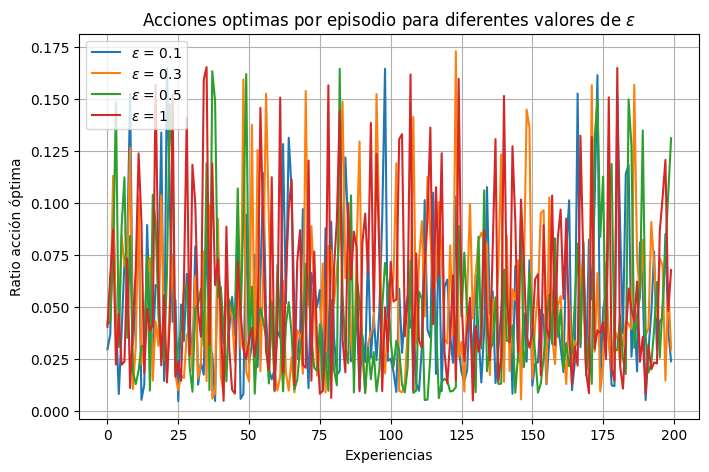

In [ ]:
Graphic_Average_reward_per_epsilon( average_reward_per_epsilon)

Para las acciones optimas tomadas se muestra la siguiente grafica con los valores de epsilon:

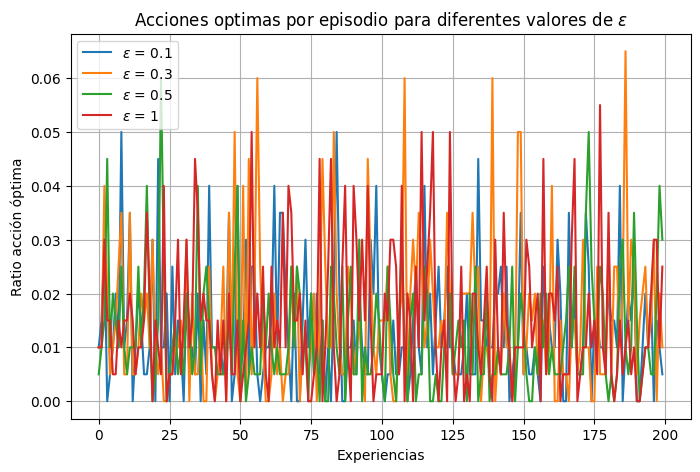

In [ ]:
Graphic_Average_reward_per_epsilon( average_optimal_actions_per_episode)